### Disney Wait Times with R
The website [TouringPlans](https://touringplans.com/blog/) makes their Disney ride wait times data publicly accessible.

They describe their data saying, "To support the next generation of theme park researchers, we're happy to provide access to our own sets of Disney wait times. Each dataset is a comma-separated file (CSV) of ASCII text, updated monthly. Each row is one discrete observation. Besides the wait times, we've provided a file of features common to each wait time. Each column is a feature we captured along with the wait time (e.g., day of week, time of day). See the data dictionary for an explanation of features."

The data for this analysis was aggregated from the Soarin' and the Spaceship Earth rides at Epcot. Specifically, I selected the first five days of January 2020 for this analysis and matched the wait times for each ride by datetime. The CSV file is available on Blackboard or by request.

#### Analysis Plan
For this analysis, I will be using R's correlation and linear regression functions to determine whether the Soarin' wait times correlate or predict the Spaceship Earth wait times.

#### Setting up the environment

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
os.environ['R_HOME'] = r"D:/Anaconda/envs/teach/Lib/R"
#this works if R is installed outside #os.environ['R_HOME'] = r"H:/R-4.0.3"
print(os.environ['R_HOME'])

D:/Anaconda/envs/teach/Lib/R


In [3]:
import rpy2
print(rpy2.__version__)

3.4.2


In [4]:
import rpy2.robjects as robjects

In [5]:
r_cor = robjects.r["cor"]
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]
r_plot = robjects.r["plot"]
r_summary = robjects.r["summary"]

#### With the environment set up, it's time to load in and look at our data

In [6]:
waits = pd.read_csv("disney_wait_times.csv")
waits.head()

,date,datetime,soarin_wait,spaceship_wait
0,1/1/2020,1/1/2020 8:43,10.0,5.0
1,1/1/2020,1/1/2020 8:50,10.0,5.0
2,1/1/2020,1/1/2020 8:57,10.0,5.0
3,1/1/2020,1/1/2020 9:08,25.0,-999.0
4,1/1/2020,1/1/2020 9:15,25.0,-999.0


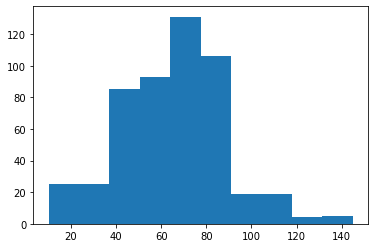

In [7]:
soarin_hist = plt.hist(waits['soarin_wait'])

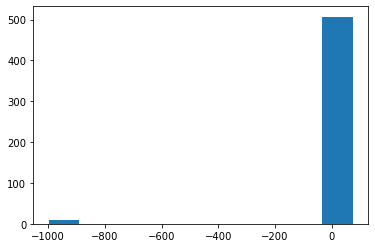

In [8]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

In [9]:
waits = waits.replace(-999.0, np.nan)

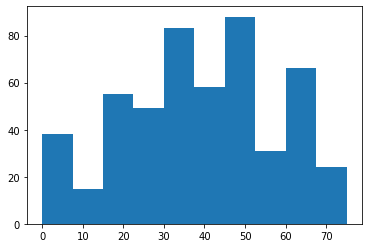

In [10]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

In [11]:
soarin_r = robjects.FloatVector(waits['soarin_wait'])
spaceship_r = robjects.FloatVector(waits['spaceship_wait'])

In [12]:
wait_cor = r_cor(soarin_r, spaceship_r, method = "pearson", use = "pairwise.complete.obs")

In [13]:
wait_cor[0]

0.36022276532483044

In [14]:
wait_cor[0] ** 2

0.12976044065826786

In [15]:
simple_form = robjects.Formula("soarin~spaceship")
simple_form.environment['soarin'] = soarin_r
simple_form.environment['spaceship'] = spaceship_r

In [16]:
wait_lm = r_lm(formula = simple_form)
type(wait_lm)

rpy2.robjects.vectors.ListVector

In [17]:
wait_lm

<rpy2.robjects.vectors.ListVector object at 0x000002321A28A500> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A7E5840> [RTYPES.REALSXP]
R classes: ('numeric',)
[48.696118, 0.457380]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A77DBC0> [RTYPES.REALSXP]
R classes: ('numeric',)
[-40.983020, -40.983020, -40.983020, -13.696118, ..., -18.269922, -33.269922, -38.269922, -38.269922]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A7E5180> [RTYPES.REALSXP]
R classes: ('numeric',)
[-1472.939920, 186.325375, -36.415494, -8.681639, ..., -14.149349, -29.149349, -34.149349, -34.149349]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x000002321A7D7140> [RTYPES.INTSXP]
R classes: ('integer',)
[2]
...
<rpy2.robjects.vectors.ListVector object at 0x000002321A28A500> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]
  qr: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (formula, data, subset, weights, na.action, method = "qr",  )
  df.residual: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x000002321A7CD540> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
<rpy2.robjects.vectors.ListVector object at 0x000002321A28A500> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]

In [18]:
wait_lm[0]

48.696118,0.457380


In [19]:
wait_lm.rx2("coefficients")

48.696118,0.457380


In [20]:
r_summary(wait_lm)

<rpy2.robjects.vectors.ListVector object at 0x000002321A7101C0> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (formula, data, subset, weights, na.action, method = "qr",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x000002321A661080> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A748E00> [RTYPES.REALSXP]
R classes: ('numeric',)
[-40.983020, -40.983020, -40.983020, -13.696118, ..., -18.269922, -33.269922, -38.269922, -38.269922]
  coefficients: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x000002321A68B600> [RTYPES.REALSXP]
R classes: ('matrix',)
[48.696118, 0.457380, 2.234515, 0.053184, 21.792703, 8.599884, 0.000000, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A35E480> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.128006]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002321A66ADC0> [RTYPES.REALSXP]
R classes: ('numeric',)
[73.958001, 1.000000, 496.000000]
  r.squared: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x000002321A377F80> [RTYPES.REALSXP]
R classes: ('matrix',)
[0.010637, -0.000228, -0.000228, 0.000006]
  adj.r.squared: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x000002321A7BBA40> [RTYPES.INTSXP]
R classes: ('omit',)
[4, 5, 6, 7, ..., 451, 469, 484, 489]